In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'Desktop\UCI_Credit_Card.csv')

In [4]:
import numpy as np

In [6]:
np.random.seed(seed=24)
random_integers = np.random.randint(low=1,high=5,size=100)
is_equal_to_3 = random_integers == 3
is_equal_to_3[:5]


array([ True, False, False, False, False])

In [7]:
sum(is_equal_to_3)

22

In [8]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Checking wether there are duplicate Id's

In [9]:
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2
dupe_mask[0:5]

2047     False
1322     False
15629    False
9486     False
11535    False
Name: ID, dtype: bool

In [10]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

0

In [11]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [12]:
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

0

In [13]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
df_clean_1['ID'].nunique()

30000

In [16]:
valid_pay_0_mask = df_clean_1['PAY_0'] != 'Not available'
valid_pay_0_mask[0:5]

C:\Users\Mini\anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0    True
1    True
2    True
3    True
4    True
Name: PAY_0, dtype: bool

In [19]:
df_clean_2 = df_clean_1.loc[valid_pay_0_mask,:].copy()
df_clean_2['PAY_0'] = df_clean_2['PAY_0'].astype('int64')
df_clean_2[['PAY_0', 'PAY_0']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_0   30000 non-null  int64
 1   PAY_0   30000 non-null  int64
dtypes: int64(2)
memory usage: 703.1 KB


In [20]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [21]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level:ordinal encoding')

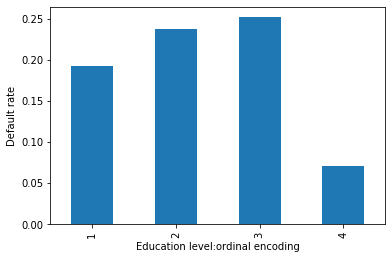

In [26]:
df_clean_2.groupby("EDUCATION").agg({'default.payment.next.month':'mean'}).plot.bar(legend=False)
plt.ylabel("Default rate")
plt.xlabel("Education level:ordinal encoding")


In [27]:
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [28]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [32]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)


,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [33]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)
df_with_ohe.to_csv('cleaned_data.csv', index=False)

In [34]:
df=pd.read_csv("cleaned_data.csv")

In [37]:
pay_feats = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [38]:
df[pay_feats].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [39]:
df[pay_feats[0]].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_0, dtype: int64

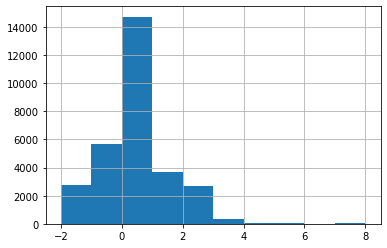

In [40]:
df[pay_feats[0]].hist()

Text(0, 0.5, 'Number of accounts')

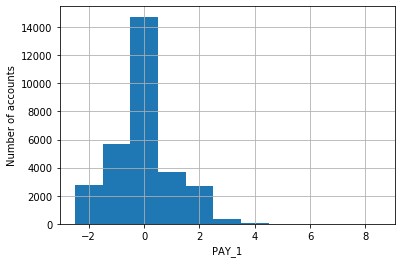

In [41]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002891FF57608>,
      dtype=object)

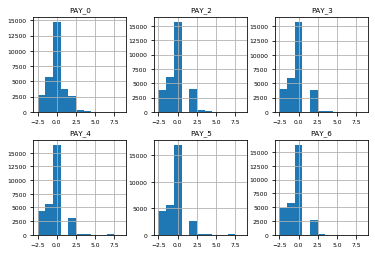

In [42]:
mpl.rcParams['font.size']=6
df[pay_feats].hist(bins=pay_1_bins,layout=(2,3))